In [7]:
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
batch_size: int = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [9]:
num_input, num_output, num_hiddens = 784, 10, 256

W1: torch.Tensor = nn.Parameter(
    torch.randn(num_input, num_hiddens, requires_grad=True)
    )
b1: torch.Tensor = nn.Parameter(
    torch.zeros(num_hiddens, requires_grad=True)
)
W2: torch.Tensor = nn.Parameter(
    torch.randn(num_hiddens, num_output, requires_grad=True)
)
b2: torch.Tensor = nn.Parameter(
    torch.zeros(num_output, requires_grad=True)
)

params: list = [W1, b1, W2, b2]
params

[Parameter containing:
 tensor([[ 1.0577, -0.6454, -0.4516,  ...,  0.1755, -0.2194, -1.0678],
         [ 1.2661, -0.3830,  0.6375,  ...,  0.7504, -2.1348,  1.2957],
         [-1.2353,  0.4059,  2.0203,  ..., -0.4960, -0.6793, -0.4634],
         ...,
         [ 1.4395,  0.6012,  2.0908,  ..., -0.7384, -0.7776,  1.4066],
         [-0.1866, -0.1083, -0.3814,  ...,  1.7583, -0.0319,  0.6444],
         [-0.5339, -1.0325, -0.7000,  ...,  1.1611, -0.3669,  0.0137]],
        requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [10]:
def ReLU(X: torch.Tensor) -> torch.Tensor:
    a: torch.Tensor = torch.zeros_like(X)
    return torch.max(X, a)

In [11]:
def net(X: torch.Tensor) -> torch.Tensor:
    X = X.reshape((-1, num_input))
    H: torch.Tensor = ReLU(torch.matmul(X, W1) + b1)
    return (torch.matmul(H, W2) + b2)

loss: nn.CrossEntropyLoss = nn.CrossEntropyLoss(reduction="none")

ValueError: None is not a valid value for reduction

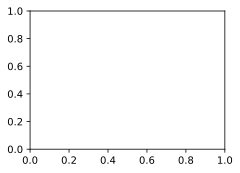

In [12]:
lr: float = 0.01
epoch: int = 10

updater: torch.optim.SGD = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, epoch, updater)